# Data Wrangling

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load data


In [2]:
white_wine_path='../0. Project Data/Original Data/winequality-white.csv'
red_wine_path='../0. Project Data/Original Data/winequality-red.csv'

In [3]:
w_df=pd.read_csv(white_wine_path, sep=';')
r_df=pd.read_csv(red_wine_path, sep=';')

In [4]:
w_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
r_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No missing values in either data set. 

Checking the dtypes of each column, everything looks normal

In [8]:
w_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
r_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Merging Data

Combining red and white wine datasets

In [10]:
w_df = w_df.assign(wine_type='white')

In [11]:
r_df = r_df.assign(wine_type='red')

In [12]:
df= pd.concat([w_df,r_df])

## Duplicate Values

There seems to be many duplicate values, 1177 rows of them. The keep='first' parameter of the duplicated method marks duplicates as True except for the first occurrence. 

In [13]:
dup_df=df[df.duplicated(keep='first')]
dup_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
7,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
8,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1564,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,red


#### Group duplicates together

Get a count of how many of each duplicate is in the dataset

In [14]:
dup_grpby=dup_df.groupby(by=dup_df.columns.tolist(),as_index=False).size().sort_values(by='size', ascending=False)
dup_grpby.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,size
460,7.0,0.150,0.28,14.70,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,7,white,7
622,7.3,0.190,0.27,13.90,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,8,white,7
661,7.4,0.160,0.30,13.70,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,7,white,6
360,6.8,0.180,0.30,12.80,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,7,white,6
728,7.6,0.200,0.30,14.20,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8,white,5
660,7.4,0.160,0.27,15.50,0.050,25.0,135.0,0.99840,2.90,0.43,8.7,7,white,5
664,7.4,0.190,0.30,12.80,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,7,white,5
665,7.4,0.190,0.31,14.50,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,6,white,5
684,7.4,0.330,0.26,15.60,0.049,67.0,210.0,0.99907,3.06,0.68,9.5,5,white,4
118,6.2,0.230,0.36,17.20,0.039,37.0,130.0,0.99946,3.23,0.43,8.8,6,white,4


#### Check distributions of our duplicate values.

The distributions of these features seem a lot tighter than that of the full dataset

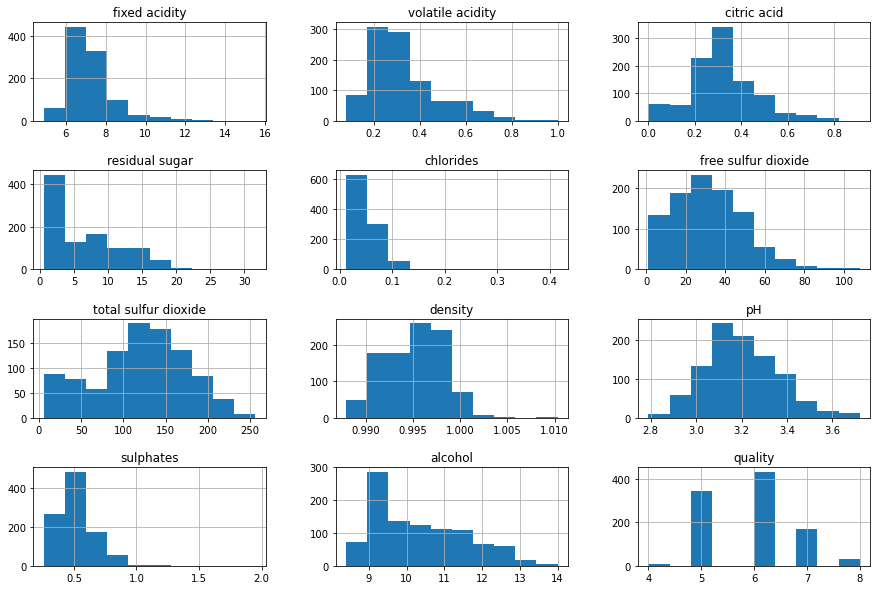

In [15]:
dup_grpby[dup_grpby.columns[:-1]].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Many of the features in our dataset are continuous so it is unlikely that 2 wines have the exact same features by chance.

Attached with the dataset was a metadata file which stated that output[quality] is based on sensory data (median of at least 3 evaluations made by wine experts). This leads us to believe that the duplicates were true duplicates and not just multiple wine tasters tasting the same wine with each recieving producing a seperate observation.

#### Remove duplicated rows

In [16]:
no_dup=df[~df.duplicated(keep='first')]
no_dup.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


#### Exporting Data

In [17]:
no_dup_red=no_dup[no_dup['wine_type']=='red']
no_dup_white=no_dup[no_dup['wine_type']=='white']

In [18]:
no_dup_red.to_csv('../0. Project Data/Processed Data/1. no_duplicates/no_duplicates_red.csv', index=False)
no_dup_white.to_csv('../0. Project Data/Processed Data/1. no_duplicates/no_duplicates_white.csv', index=False)